<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Mohammad Abolnejadian
### Student Number : 98103867
### Colab Link: https://colab.research.google.com/drive/1-Gw_PnKxwSRDTspx2oSH74gAPzASqIbS?usp=sharing
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [152]:
# you can use the following packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from random import choices
import math

## P1: Explore the Dataset

In [153]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-05 20:21:36--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-05 20:21:36--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc28ce0faa8be94b59f28afd0092.dl.dropboxusercontent.com/cd/0/get/B9Yc1Bzaom40tAkbnN57nwcwbn5bSrq2vd-jOoqNcrmrN34leTz8YfAyO41Ud7eykJiVDyF2CAtnAzupZJuGlr7Hwp5bgBIMqvoTQrLUOqo5Hgtvn5zt4rFFpt9BDvdjwk6MP4QlUQ7_B8xuoVl-8q5bRBK4DxweBrPWUkrjmJaZzqCRvtTxwn1wI8VNV4fQH7k/file?dl=1# [following]
--2023-06-05 20:21:37--  https://uc28ce0faa8be94b59f28afd0092.dl.dropboxusercontent.com/cd/0/get/B9Yc1Bzaom40tAkbnN57nwcwbn5bSrq2vd-

Load the dataset as a dataframe

In [154]:
df = pd.read_csv("dataset.csv")
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [155]:
#Check if there are missing values
df_null = df.isna().isin([True])
df_null_count = df_null.sum()
print(df_null_count)
df.dropna(inplace=True)
df

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

<Axes: >

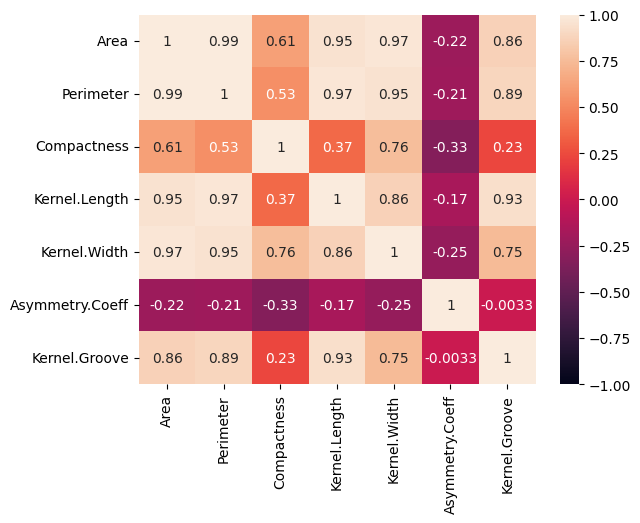

In [156]:
df_features = df.drop("Type", axis=1)
df_target = df["Type"]
sns.heatmap(df_features.corr(),vmin=-1, vmax=1, annot=True)

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [157]:
corr = df_features.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
uncorrelated_df_features = df_features.drop(to_drop, axis=1)
uncorrelated_df_features

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove
0,15.26,0.8710,2.221,5.220
1,14.88,0.8811,1.018,4.956
2,14.29,0.9050,2.699,4.825
3,13.84,0.8955,2.259,4.805
4,16.14,0.9034,1.355,5.175
...,...,...,...,...
194,12.19,0.8783,3.631,4.870
195,11.23,0.8511,4.325,5.003
196,13.20,0.8883,8.315,5.056
197,11.84,0.8521,3.598,5.044


Check for imbalance between classes **(P1-4: 3 points)**

In [158]:
classes = df_target.value_counts(normalize=True)
classes

2    0.341709
1    0.331658
3    0.326633
Name: Type, dtype: float64

*So classes are not imbalanced significantly*

## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [159]:
features = uncorrelated_df_features.to_numpy()
target = df_target.to_numpy()
features.shape, target.shape

((199, 4), (199,))

Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [160]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [161]:
class Node:
  def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
    self.feature_idx = feature_idx
    self.threshold=threshold 
    self.left=left
    self.right=right
    self.value=value

class DecisionTree:
     
    def __init__(self, criterion="entropy", max_depth=None):
        """
        Parameters:
        
        criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        self.root=None
        self.max_depth = max_depth
        self.criterion = criterion
    
    def fit(self, X, y):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """
        self.n_samples, self.n_features = X.shape
        self.root = self._grow_tree(X, y, 0)
        return self

    def _grow_tree(self, X, y, tree_depth=0):
      n_classes = len(np.unique(y))

      #if we have arrive at a leaf
      if n_classes <= 1 or\
          (self.max_depth is not None and tree_depth >= self.max_depth):
        value = self._vote_leaf(y)
        leaf_node = Node(value = value)
        return leaf_node
      #Else in decision nodes
      best_split_idx, best_split_threshold = self._get_best_split(X, y)

      X_feature = X[:, best_split_idx]
      left_idxs, right_idxs = self._split(X_feature, best_split_threshold)
      left = self._grow_tree(X[left_idxs, :], y[left_idxs], tree_depth + 1)
      right = self._grow_tree(X[right_idxs, :], y[right_idxs], tree_depth + 1)
      return Node(feature_idx=best_split_idx, threshold=best_split_threshold, left=left, right=right)
      
    def _get_best_split(self, X, y):
      best_info_gain = -float("inf")
      best_split_idx, best_split_threshold = None, None

      for feature_idx in range(self.n_features):
        X_feature = X[:, feature_idx]
        possible_thresholds = np.unique(X_feature)

        for threshold in possible_thresholds:
          gain_feature_threshold = self._information_gain(X_feature, y, threshold)
          if gain_feature_threshold > best_info_gain:
            best_info_gain = gain_feature_threshold
            best_split_idx = feature_idx
            best_split_threshold = threshold
      
      return best_split_idx, best_split_threshold


    def _information_gain(self, X, y, threshold):
      left_idxs, right_idxs = self._split(X, threshold)
      if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
      n_l = len(left_idxs)
      n_r = len(right_idxs)
      n = len(y)
      if self.criterion=="entropy":
        child_entropy = (n_l / n) * self._entropy(y[left_idxs]) + (n_r / n) * self._entropy(y[right_idxs])
        parent_entropy = self._entropy(y)
        return parent_entropy - child_entropy
      else:
        child_gini = (n_l / n) * self._gini(y[left_idxs]) + (n_r / n) * self._gini(y[right_idxs])
        parent_gini = self._gini(y)
        return parent_gini - child_gini
    
    def _entropy(self, y):
      nominator = np.bincount(y)
      pi_s = nominator / len(y)
      entropy = -np.sum([p * np.log2(p) for p in pi_s if p > 0])
      return entropy

    def _gini(self, y):
      nominator = np.bincount(y)
      pi_s = nominator / len(y)
      gini = 1 - np.sum([p**2 for p in pi_s if p > 0])
      return gini
      
    def _split(self, X, threshold):
        left_idxs = np.argwhere(X <= threshold).flatten()
        right_idxs = np.argwhere(X > threshold).flatten()
        return left_idxs, right_idxs

    def _vote_leaf(self, y):
      values, counts = np.unique(y, return_counts=True)
      return values[np.argmax(counts)]
  
    def predict(self, X):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """
        y = np.array([self._make_prediction(x, self.root) for x in X])
        return y
      
    def _make_prediction(self, x, node):
      if node.value is not None:
        return node.value
      if x[node.feature_idx] <= node.threshold:
        return self._make_prediction(x, node.left)
      return self._make_prediction(x, node.right)

Define two decision trees with two different criteria **(P3-2: 3 points)**

In [162]:
gini_tree = DecisionTree(criterion = "gini")
entropy_tree = DecisionTree(criterion = "entropy")

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [163]:
gini_tree.fit(X_train, y_train)
entropy_tree.fit(X_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [164]:
y_predicted_gini = gini_tree.predict(X_test)
y_predicted_entropy = entropy_tree.predict(X_test)
y_predicted_gini, y_predicted_entropy

(array([2, 1, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 1, 3, 2, 1, 2, 2,
        2, 3, 2, 3, 3, 1, 3, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2]),
 array([2, 1, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 1, 3, 2, 3, 2, 2,
        2, 3, 2, 3, 3, 1, 3, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2]))

Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [165]:
depths = [1, 2, 3, 4, 5]
gini_trees = []
entropy_trees = []
for depth in depths:
  gini_trees.append(DecisionTree(criterion = "gini", max_depth = depth).fit(X_train, y_train))
  entropy_trees.append(DecisionTree(criterion = "entropy", max_depth = depth).fit(X_train, y_train))

Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

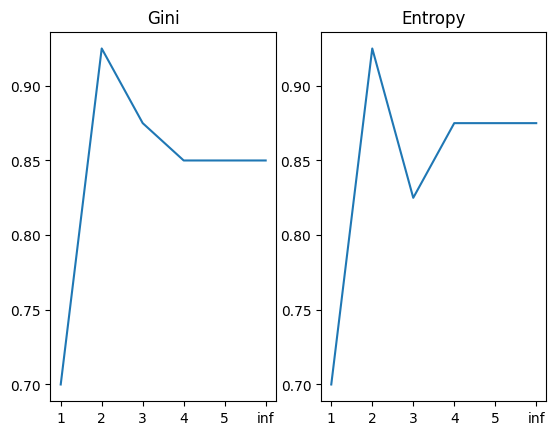

In [166]:
from sklearn.metrics import accuracy_score
accuracy_gini_no_depth = accuracy_score(y_test, y_predicted_gini)
# accuracy_gini_no_depth = np.sum(y_predicted_gini == y_test) / len(y_test)
accuracy_entropy_no_depth = accuracy_score(y_test, y_predicted_entropy)
# accuracy_entropy_no_depth = np.sum(y_predicted_entropy == y_test) / len(y_test)
accuracies_gini_with_depth = []
accuracies_entropy_with_depth = []
for gini_tree in gini_trees:
  accuracies_gini_with_depth.append(accuracy_score(y_test, gini_tree.predict(X_test)))
for entropy_tree in entropy_trees:
  accuracies_entropy_with_depth.append(accuracy_score(y_test, entropy_tree.predict(X_test))) 

depths.append("inf")
accuracies_gini_with_depth.append(accuracy_gini_no_depth)
accuracies_entropy_with_depth.append(accuracy_entropy_no_depth)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(depths, accuracies_gini_with_depth)
ax2.plot(depths, accuracies_entropy_with_depth)

ax1.set_title('Gini')
ax2.set_title('Entropy')
plt.show()

**Limiting maximum depth can minimize computation time, while controlling the variance. As it can be seen, the model with maximum depth 2 does a better job on the test dataset; This is because deeper trees tend to overfit and give worse accuracy on the test dataset.**

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [174]:
class BaggingDecisionTree:
     
    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:
        
        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """
        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
    
    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        """
        self.models = np.array([])
        self.n_samples, self.n_features = X.shape
        #bootstrapping
        for _ in range(self.bootstraped_training_num):
          idxs=np.random.choice(len(X),size=len(X), replace = True)
          Xi = X[idxs]
          yi = y[idxs]
          model=DecisionTree()
          model.fit(Xi, yi)
          self.models = np.append(self.models, model)

        return self
    
    def predict(self, X):
        """
        Predict class value for X using mavority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        y = np.array([self._make_prediction(x, self.predictors_num) for x in X])
        return y
    
    def _make_prediction(self, x, predictors_num):
      #Choose predictors_num models
      selected_models = np.random.choice(self.models, size = predictors_num)
      for model in selected_models:
        predictions = model._make_prediction(x, model.root)
      aggregated_prediction = self._vote_leaf(predictions)
      return aggregated_prediction
        
    def _vote_leaf(self, y):
      values, counts = np.unique(y, return_counts=True)
      return values[np.argmax(counts)]

Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [175]:
initial_bagging_tree = BaggingDecisionTree().fit(X_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [176]:
second_bagging_tree = BaggingDecisionTree(predictors_num=7).fit(X_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [181]:
first_score = accuracy_score(y_test, initial_bagging_tree.predict(X_test))
second_score = accuracy_score(y_test, second_bagging_tree.predict(X_test))
print("First bagging: " + str(first_score))
print("Second bagging: " + str(second_score))

First bagging: 0.9
Second bagging: 0.85


**As we get more predictors, we get less variance and the accuracy on the test data will get better. This is because more predictors capture more data patterns.
If we get use less predictors, as it can be seen the accuracy will be less because we use less predictors.**

### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

In [171]:
class AdaBoost:
     
    def __init__(self, weak_classifiers_count=50):
        """
        Parameters:
        weak_classifiers_count -- The number of weak classifiers we are gonna have
        """
        self.weak_classifiers_count = weak_classifiers_count
        self.weak_learners = []
        # self.training_errors = []
        self.ats = [] 
    
    def fit(self, X, y):
        """
        Fit the Adaboost on training data. take DecisionTree with max_depth of 1 as your weak classifier.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        
        """
        # self.training_errors = []
        #amounts to say
        self.ats = [] 
        self.n_samples, self.n_features = X.shape
        self.ys = np.unique(y)

        for m in range(self.weak_classifiers_count):
          if m == 0:
            w_i = np.ones(len(y)) * 1 / len(y) #initial weights
          else:
            w_i = self._update_weights(w_i, last_amount_to_say, y, y_pred)
            w_i = w_i / np.sum(w_i) #normalize
          
          #Stump
          weak_model = DecisionTree(max_depth = 1)
          #The way we configure weights is that we resample from the dataset based on weights
          sample_idx = np.random.choice(len(X), len(X), p = w_i)
          sample_Xs = X[sample_idx]
          sample_ys = y[sample_idx]
          weak_model.fit(sample_Xs, sample_ys)

          y_pred = weak_model.predict(X)
          self.weak_learners.append(weak_model)

          error_weaklearner = self._compute_error(y, y_pred, w_i) 
          # self.training_errors.append(error_weaklearner)
          last_amount_to_say = self._compute_amount_to_say(error_weaklearner)
          self.ats.append(last_amount_to_say)

        return self
    
    def _compute_amount_to_say(self, error):
      #based on the formula
      return np.log((1 - error) / error)

    def _compute_error(self, y, y_pred, w_i):
      #based on the formula of total error
      return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

    def _update_weights(self, w_i, amount_to_say, y, y_pred):
      return w_i * np.exp(amount_to_say * (np.not_equal(y, y_pred)).astype(int))

    def predict(self, X):
        """
        Predict class value for X using mavority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        y = np.array([self._make_prediction(x) for x in X])
        return y
      
    def _make_prediction(self, x):
      a = dict.fromkeys(self.ys, 0)
      for m in range(self.weak_classifiers_count):
        weak_classifier = self.weak_learners[m]
        y_pred_m = weak_classifier._make_prediction(x,weak_classifier.root)
        a[y_pred_m] += self.ats[m]
      return max(a, key=a.get)

Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [172]:
adaboost_classifier = AdaBoost().fit(X_train, y_train)

Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [173]:
adaboost_prediction = adaboost_classifier.predict(X_test)
adaboost_score = accuracy_score(y_test, adaboost_prediction)
print("Adaboost accuracy is: "+ str(adaboost_score))

Adaboost accuracy is: 0.925
